In [11]:
ddir = '../opt tweez data/02_12_2014/2_12_2014_part3/'
files = list.files(ddir)

#fn = 5 #length(files) # We take the last one for no particular reason
fn = 5

files[fn]

[1] "b3um_I1000mA_t50us_fs5kHz.txt"

,V1,V2
1,8.167,6.533
2,8.155,6.648
3,8.104,6.621
4,8.078,6.648
5,8.091,6.588
6,8.133,6.608
7,8.198,6.622
8,8.164,6.587
9,8.132,6.578
10,8.107,6.654


[1] 100000

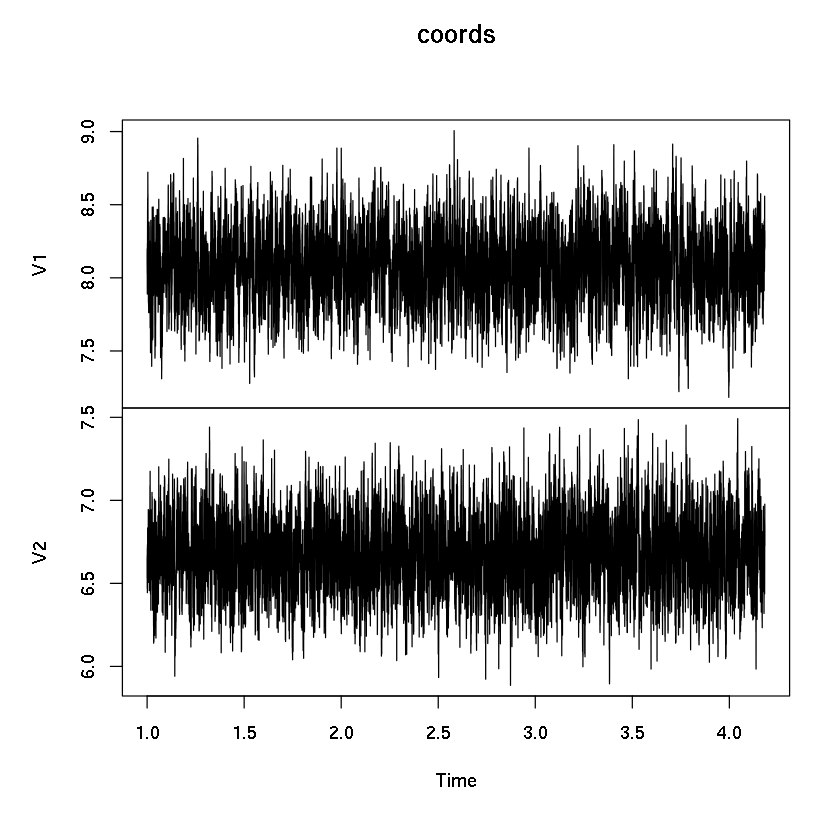

In [7]:
fps = 5000

coords = read.table(paste(ddir,files[fn],sep=''),sep =';',dec = ',')
coords[1:10,]
length(coords[,1])

#coords = ts(coords[,2:3]) # line numbers, etc. present
coords = ts(coords[,1:2], frequency = fps*2*pi)
plot(coords)

For $ \mathrm{acov}(\tau) = \sigma^2 e^{-k|\tau|}$, the fourier transform is

$$
\begin{align}
\mathrm{\hat{acov}}(\omega) &= \int_{-\infty}^{\infty} e^{i \omega \tau} \mathrm{acov}(\tau) \,d\tau \\
 &= \sigma^2 \int_{-\infty}^{\infty} e^{i \omega \tau} e^{-k|\tau|} \,dt \\
 &= \sigma^2 \int_{-\infty}^{\infty} e^{(i \omega - k) \tau} \,dt \\
 &= \frac{\sigma^2}{\omega^2 + k^2}
\end{align}
$$

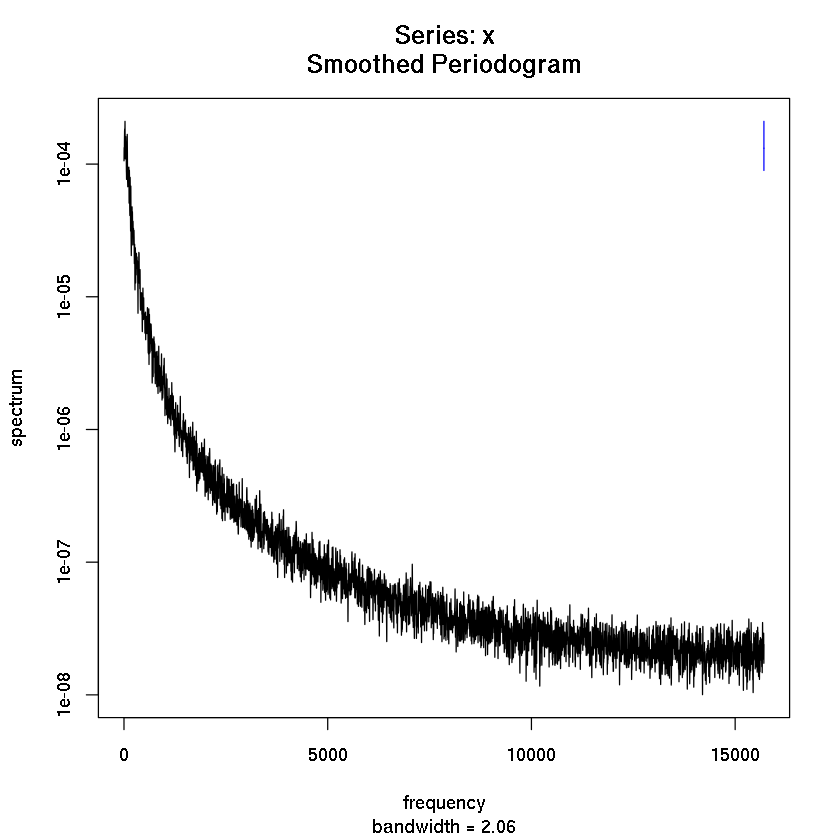

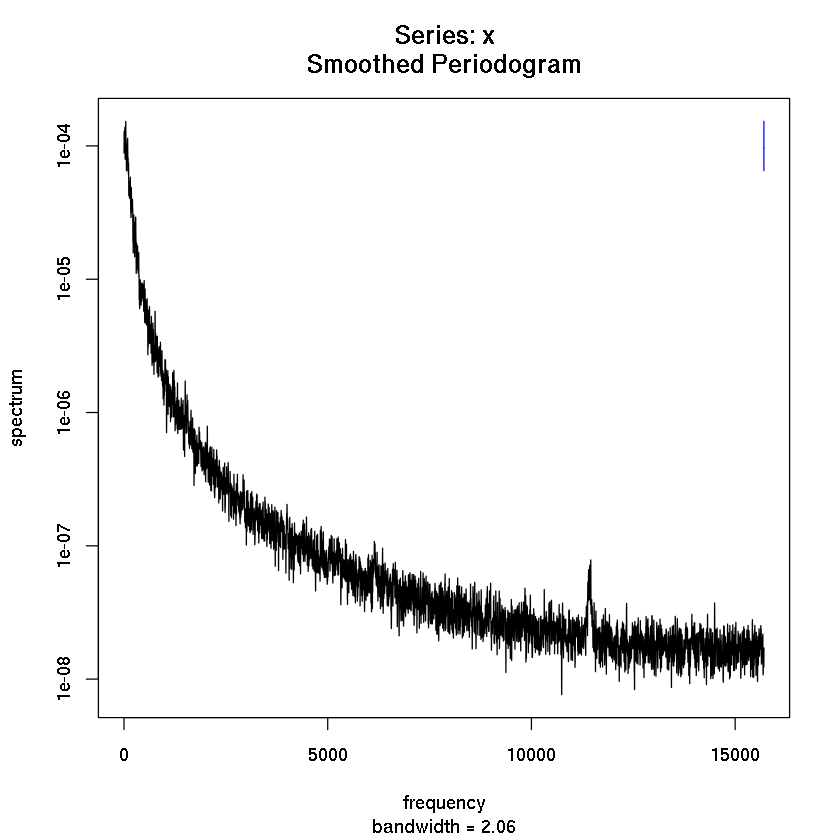

In [8]:
# Smoothing kernel parameters for the power density spectrum
kparams = c(16,16)

sx = spectrum(coords[,1], spans=kparams)
sy = spectrum(coords[,2], spans=kparams)

In [9]:
# Initial values
sigma0 = 1
k0 = 100

# Extract values to fit to
specx = sx$spec
freqx = sx$freq

# Fit the fourier transform of acov(x) (acov(y))
fitx = nls(specx ~ (sigma^2)/(freqx^2 + k^2),
                 start = list(sigma = sigma0, k = k0))
fitx

specy = sy$spec
freqy = sy$freq

fity = nls(specy ~ (sigma^2)/(freqx^2 + k^2),
                 start = list(sigma = sigma0, k = k0))
fity

Nonlinear regression model
  model: specx ~ (sigma^2)/(freqx^2 + k^2)
   data: parent.frame()
  sigma       k 
  1.392 109.820 
 residual sum-of-squares: 3.083e-07

Number of iterations to convergence: 5 
Achieved convergence tolerance: 7.34e-07

Nonlinear regression model
  model: specy ~ (sigma^2)/(freqx^2 + k^2)
   data: parent.frame()
  sigma       k 
  1.331 121.962 
 residual sum-of-squares: 1.321e-07

Number of iterations to convergence: 4 
Achieved convergence tolerance: 9.932e-06

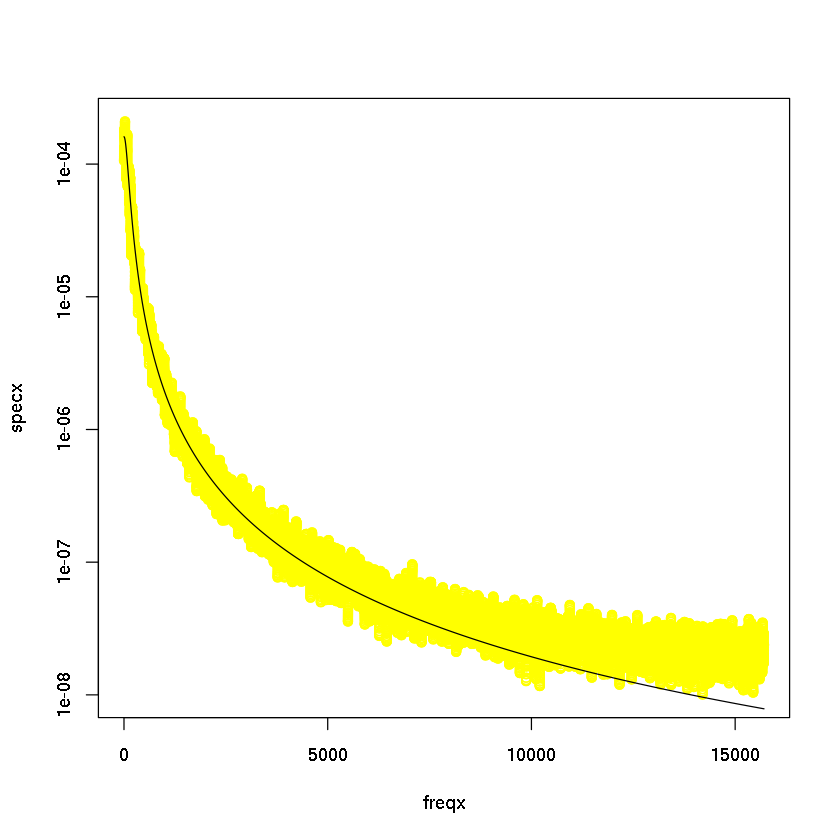

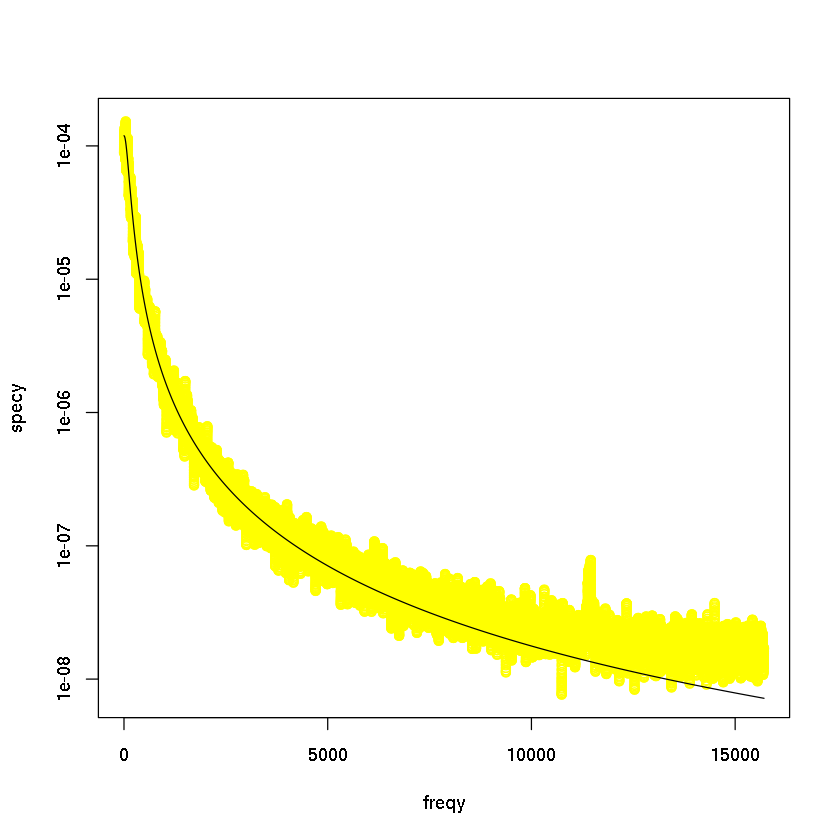

In [10]:
coefsx = coef(fitx)
plot(freqx, specx, col='yellow', log='y')
lines(freqx, (coefsx['sigma']^2)/(freqx^2+coefsx['k']^2), type='l')

coefsy = coef(fity)
plot(freqy, specy, col='yellow', log='y')
lines(freqy, (coefsy['sigma']^2)/(freqy^2+coefsy['k']^2), type='l')